# In-Class Exercise (Lecture 5)

In [2]:
import numpy as np
import timeit
import random

---

## Q1. Modelling Stock Returns via Random Walks

In lecture 4, we introduced the simple random walk, which starts at 0 and moves with steps of 1 and -1 occuring with equal probability. Suppose we use $X_t$ to denote such a simple random walk, $\Delta t$ is the time step (e.g., one trading day or week, etc.), and $\Delta X_{t+\Delta t} = X_{t+\Delta t} - X_{t}$ denotes the movement between time $t$ and $t+\Delta t$. The definition of simple random walks implies that 
$$
\mathbf{P} [\Delta X_{t+\Delta t} = 1] = \mathbf{P} [\Delta X_{t+\Delta t} = -1] = \frac{1}{2}. 
$$
In other words, $X_t$ increases or decreases by 1 unit with equal probabilities. 

In this question, we twist the simple walk to model stock returns. Suppose that we are interested in the S&P 500 index. The behaviors of this stock index are similar to the simple random walk in the sense that it is difficult to predict. However, the stock index tends to increase in the long run. For example, the average annualized return of the S&P 500 index is around $10\%$. We also want to change the step size of the simple random walk to fit the real behavior of the stock return. Let's use $P_t$ to denote the S&P 500 index (the stock price), so its return between time $t$ and $t+\Delta t$ is defined as 
$$
R_{t+\Delta t} = \frac{P_{t+\Delta t} - P_t}{P_t},
$$
and we model the behavior of $R_{t+\Delta t}$ as follows: 
$$
R_{t+\Delta t} = \mu \times \Delta t + \sigma \times \sqrt{\Delta t} \times \Delta X_{t+\Delta t},
$$
where $\mu$ and $\sigma$ are the mean and standard deviation of the S&P 500 index return. 

Finally, $R_{t \to T} = \frac{P_{T} - P_t}{P_t}$ is approximated as follows:
$$
R_{t \to T} = \prod^{\frac{T-t}{\Delta t}}_{i=1} \big(1 + R_{t+ i \cdot \Delta t} \big) - 1,
$$
which implies $P_T = P_t \cdot (1 + R_{t \to T})$. Here, we assume that $\frac{T-t}{\Delta t}$ is an integer (we can also guarantee this condition by choosing a suitable $\Delta t$).

### Q1.1 

In this question, you are asked to write a ```stock_price_simulations``` function with the specifications: 
```python
def stock_price_simulations(P0, T, delta_t, mu, sigma, nwalks):
    """
    P0: the current stock price;
    T: time-to-maturity;
    delta_t: the time step, double numeric (we choose delta_t such that T/delta_t is an integer);
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nwalks: the number of stock return random walks, integer;
    Return: a two-dimensional np.array, with each row storing one draw of stock price
            random walk with nsteps. 
    """
```

Hint: The stock return equation is $R_{t+\Delta t} = \mu \times \Delta t + \sigma \times \sqrt{\Delta t} \times \Delta X_{t+\Delta t}$, where simulating $\Delta X_{t+\Delta t}$ (the simple random walk) is the same as in the function ```random_walk_simulations(nsteps, nwalks)``` in the in-class assignment 4. 

The np.array ```P1``` contains 10,000 draws of stock return random walks, each of which has 2,520 steps.
```python
### After you create the above function, run the following code:
P1 = stock_price_simulations(P0, T, delta_t, mu, sigma, nwalks)
print(P1.shape)   # Here, you should get (10000, 2520)
```

In [8]:
import numpy as np
np.random.seed(12345)

T = 1          # time to maturity
mu = 0.1       # annualised average return
sigma = 0.3    # annualised volatility
r = 0.04       # annualised risk-free rate
P0 = 50        # current stock price
delta_t = 1 / 2520
nwalks = 10000 # the number of random walks

In [9]:
def stock_price_simulations(P0, T, delta_t, mu, sigma, nwalks):
    """
    P0: the current stock price;
    T: time-to-maturity;
    delta_t: the time step, double numeric (we choose delta_t such that T/delta_t is an integer);
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nwalks: the number of stock return random walks, integer;
    Return: a two-dimensional np.array, with each row storing one draw of stock price
            random walk with nsteps. 
    """
    
    nsteps = int(T/delta_t)   # the number of steps in each stock return random walk, integer;
    draws = np.random.randint(0, 2, size=(nwalks, nsteps))
    steps = np.where(draws > 0, 1, -1)
    returns = steps*sigma*np.sqrt(delta_t) + mu*delta_t
    P1 = P0 * (1+returns).cumprod(axis=1)
    return P1


In [10]:
P1 = stock_price_simulations(P0, T, delta_t, mu, sigma, nwalks)
print(P1.shape)

(10000, 2520)


### Q1.2

You learnt the following Black-Scholes-Merton formula of the European call option before: <br>
<br>
\begin{equation}
c(P_t, K, \sigma, r, T-t) = P_t \cdot N(d_1) - e^{-r (T-t)} K N(d_2)
\label{eq:euro_call_BS} \tag{1}
\end{equation} 
<br>
where 
- $P_t$ is the stock price at time $t$,
- $K$ is the strike price of the European call option,
- $\sigma$ is the volatility of the stock return,
- $r$ is the risk-free rate,
- $T-t$ is the time-to-maturity, and 
- $N(\cdot)$ is the cumulative distribution function of the standard normal ditribution, 

\begin{equation}
d_1 = \frac{\ln(\frac{P_t}{K}) + (r + \frac{1}{2} \sigma^2)(T-t)}{\sigma \sqrt{T-t}}, \ 
d_2 = d_1 - \sigma \sqrt{T-t}.
\label{eq:euro_call_BS_d} \tag{2}
\end{equation}

In this question, you are required to write a Python function to compute the call option price based on equation (1):
```python
def euro_call_BS(P0, r, T, sigma, K):
    """
    P0: current asset price;
    r: (annualized) risk-free rate;
    T: time to maturity;
    sigma: volatility of asset returns;
    K: strike price;
    
    Return the price of European call option implied by Black-Scholes Formula.
    """
    pass
```

Suppose that the strike price of the European call option is 50, and the values of other parameters are given in Q1.1. What is the price of this European call option based on ```euro_call_BS```?
```python
K = 50
price_bs = euro_call_BS(P0, r, T, sigma, K)
print("Black-Scholes price of European call option is", "%.4f" % price_bs)
```

In [13]:
from scipy.stats import norm

You need to use the above ```norm``` function to compute the cdf of the standard normal distributions, e.g., ```norm.cdf(d1)``` and ```norm.cdf(d2)```. 

In [15]:
def euro_call_BS(P0, r, T, sigma, K):
    """
    P0: current asset price;
    r: (annualized) risk-free rate;
    T: time to maturity;
    sigma: volatility of asset returns;
    K: strike price;
    
    Return the price of European call option implied by Black-Scholes Formula.
    """
    
    d1 = (np.log(P0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    return(P0*norm.cdf(d1) - np.exp(-r*T)*K*norm.cdf(d2))

In [16]:
K = 50
price_bs = euro_call_BS(P0, r, T, sigma, K)
print("Black-Scholes price of European call option is", "%.4f" % price_bs)

Black-Scholes price of European call option is 6.8766


### Q1.3

Remember that in the risk-neutral pricing, the fair price of European call option with strike price $K$ is equal to 

\begin{equation*}
C(t, S_t) = \exp \{ - r (T-t) \} \cdot \mathbb{E}^Q_t [ \max\{ P_T - K, 0 \} ], 
\label{eq:risk_neutral_price} \tag{3}
\end{equation*} where $P_T$ is equal to 
\begin{equation*}
P_T = P_t \cdot R_{t \to T}.
\label{eq:risk_neutral_stock} \tag{4}
\end{equation*}

To approximate $\mathbb{E}^Q_t [ \max\{ P_T - K, 0 \} ]$, we need to draw a huge amount of simulation paths according to equation (\ref{eq:risk_neutral_stock}). We denote the simulated outcomes of stock price as $\{P_T (\omega_j) \}_{j=1}^{M}$, then
\begin{equation*}
\mathbb{E}^Q_t [ \max\{ P_T - K, 0 \} ] \approx \frac{1}{M} \sum_{j=1}^M (P_T (\omega_j) - K)^{+}.
\label{eq:risk_neutral_appro} \tag{5}
\end{equation*}


Now the question is how to simulate $R_{t \to T}$. We rely on the generalized random walk process in Q1.1 (see the function ```stock_price_simulations```). Given the background information, you are required to conduct two analysese:
- Create a ```euro_call_MC``` function that satisfies the given function specifications:
```python
def euro_call_MC(P0, K, T, delta_t, mu, sigma, nwalks):
    """
    P0: the current stock price;
    K: the strike price;
    T: time-to-maturity;
    delta_t: the time step, double numeric;
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nwalks: the number of stock price random walks, integer;
    Return: the approximated price of the European call option based on Monte-Carlo simulations.
    """
    pass
### After you create the above function, please execute the following code:
print("European call option price based on Monte-Carlo simulations is", "%.4f" % euro_call_MC(P0, K, T, delta_t, r, sigma, nwalks))
```

- Run the function ```euro_call_MC(P0, K, T, delta_t, mu, sigma, nwalks)``` for 100 times and record the approximated option prices in a structured sequence (e.g., ```np.array```). Finally, show the distribution (5th and 95th quantiles, as well as the median) of approximated option prices across 100 Monte-Carlo simulations. Are the call option prices given by Monte-Carlo simulations consistent with the one given by Black-Scholes-Merton formula in Q1.2?

In [19]:
def euro_call_MC(P0, K, T, delta_t, mu, sigma, nwalks):
    """
    P0: the current stock price;
    K: the strike price;
    T: time-to-maturity;
    delta_t: the time step, double numeric;
    mu, sigma: mean and standard deviation of the stock return, double numeric;
    nwalks: the number of stock price random walks, integer;
    Return: the approximated price of the European call option based on Monte-Carlo simulations.
    """
    nsteps = int(1 / delta_t)
    P1 = stock_price_simulations(P0, T, delta_t, mu, sigma, nwalks)
    return np.where(P1[:,-1] > K, P1[:,-1]-K, 0).mean() * np.exp(-r*T)
    

In [20]:
print("European call option price based on Monte-Carlo simulations is", "%.4f" % euro_call_MC(P0, K, T, delta_t, r, sigma, nwalks))

European call option price based on Monte-Carlo simulations is 6.9084


In [21]:
nsim = 100
call_price_seq = np.zeros(nsim)

for i in range(nsim):
    if i%10 == 0:
        print("i =", i)
    call_price_seq[i] = euro_call_MC(P0, K, T, delta_t, r, sigma, nwalks)

i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


In [22]:
np.quantile(call_price_seq, q=[0.05, 0.5, 0.95])

array([6.70389204, 6.89975045, 7.04806767])

(array([ 1.,  0.,  0.,  2.,  8., 16., 22., 27., 18.,  6.]),
 array([6.374264  , 6.44881913, 6.52337426, 6.59792939, 6.67248452,
        6.74703965, 6.82159478, 6.89614991, 6.97070503, 7.04526016,
        7.11981529]),
 <BarContainer object of 10 artists>)

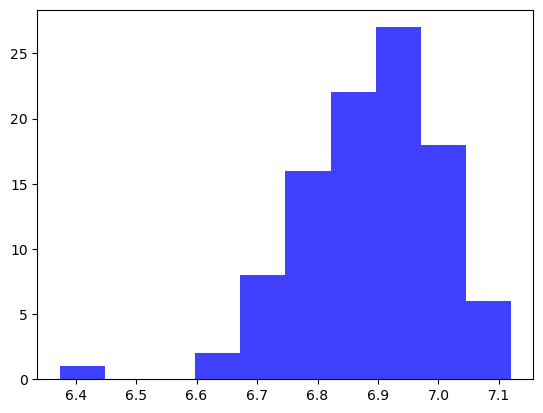

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
axes.hist(call_price_seq, bins=10, color='b', alpha=0.75)

---

# END